1. Analyse retail sales data to identify trends, seasonal patterns, and product performance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\Adina\OneDrive - Romanian-American University (STUD)\Year 3\SoftwarePackages\Homework1\online_retail.csv"
file = pd.read_csv(path)
file.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Adina\\OneDrive - Romanian-American University (STUD)\\Year 3\\SoftwarePackages\\Homework1\\online_retail.csv'

In [ ]:
file.describe()

,Quantity,Price,Customer ID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
file["Description"].nunique(), file["StockCode"].nunique(), file["Customer ID"].nunique()
#identifies the unique values

(4223, 4070, 4372)

In [3]:
file["Total"] = file["Quantity"] * file["UnitPrice"]
file.head()
file[file["Total"] < 0] #counts the rows and columns 

NameError: name 'file' is not defined

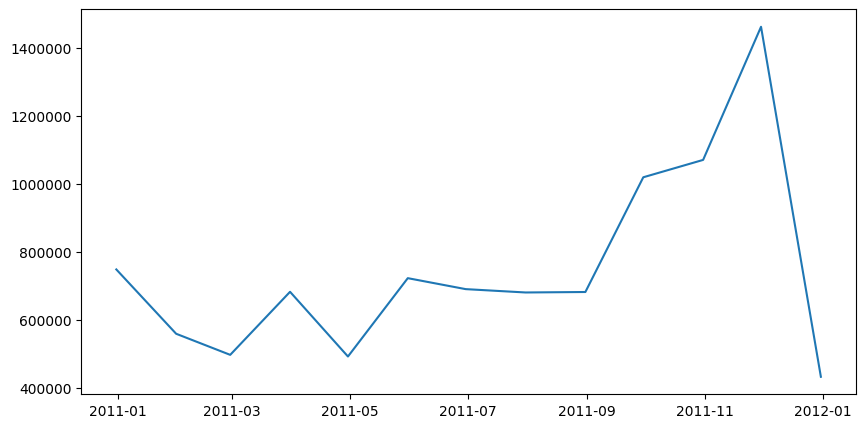

In [ ]:
#trend with the sales
df_grouped = file.groupby(by="InvoiceDate")["Total"].sum()
file_monthly = df_grouped.resample('M').sum()
file_monthly = pd.DataFrame(file_monthly)

#created data frame

_ = plt.figure(figsize=(10, 5))
plt.plot(file_monthly)
plt.ticklabel_format(style='plain', axis='y') #uses the dates
plt.show()


In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 5))
plt.plot(file_monthly.index, file_monthly['Total'])
plt.ticklabel_format(style='plain', axis='y')

trend = file_monthly['Total'].rolling(window=3, center=True).mean()
plt.plot(file_monthly.index, trend, "r--")
plt.show()

NameError: name 'file_monthly' is not defined

<Figure size 1000x500 with 0 Axes>

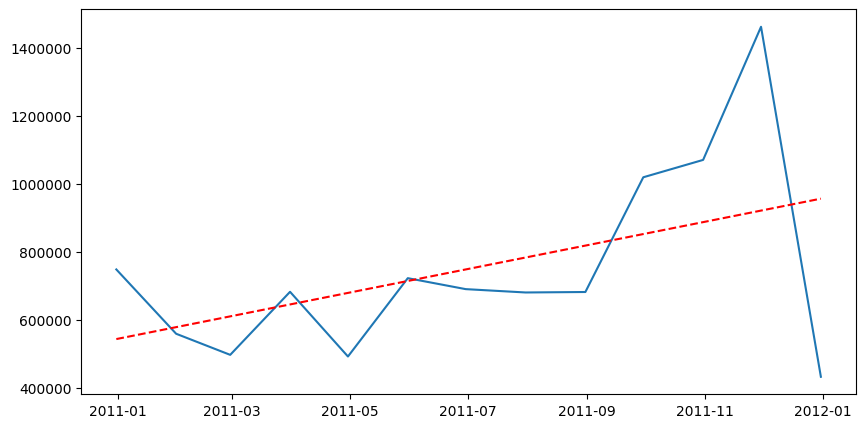

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 5))
plt.plot(file_monthly.index, file_monthly['Total'])
plt.ticklabel_format(style='plain', axis='y')
data = np.polyfit(mdates.date2num(file_monthly.index), file_monthly['Total'], 1)
our_plot = np.poly1d(data)
plt.plot(file_monthly.index, our_plot(mdates.date2num(file_monthly.index)), "r--")
plt.show()

In [ ]:
trend = file_monthly['Total'].rolling(window=3, center=True).mean()
seasonality = file_monthly['Total'] - trend

plt.figure(figsize=(10, 5))
plt.plot(file_monthly, label="Original Data")
plt.plot(file_monthly.index, seasonality, label="Seasonality")
plt.legend()
plt.show()

NameError: name 'file_monthly' is not defined

##Product - Performace

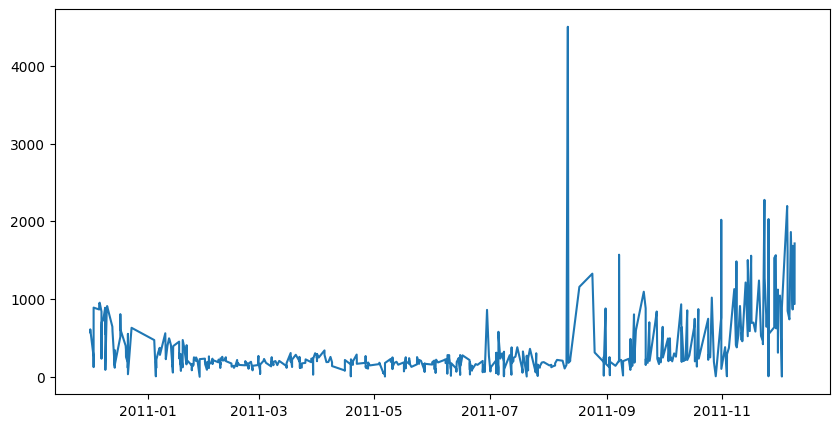

In [ ]:
df_bp1 = file[file["Description"] == "DOTCOM POSTAGE"]
plt.figure(figsize=(10, 5))
plt.plot(df_bp1["InvoiceDate"], df_bp1["Total"])
plt.show()

In [ ]:
#To find the product with the most revenue

df_bp = file.groupby(by="Description")["Total"].sum()
df_bp = pd.DataFrame(df_bp)
df_bp = df_bp.reset_index()

df_bp[df_bp["Total"] == df_bp["Total"].max()] #max()

,Description,Total
1098,DOTCOM POSTAGE,206245.48


Explore patient data to identify trends in diseases, treatment effectiveness, or healthcare resource utilization.

In [ ]:
import yfinance as yf
startDate = "2015-01-08"
endDate = "2023-12-12"
tck = "AAPL"
price = yf.download([tck], start=startDate, end=endDate, interval="1mo")
price.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-02-01,29.512501,33.400002,29.020000,32.115002,28.747469,4546140800
2015-03-01,32.312500,32.570000,30.407499,31.107500,27.955503,4554568400
2015-04-01,31.205000,33.634998,30.775000,31.287500,28.117264,3984542000
2015-05-01,31.525000,33.242500,30.840000,32.570000,29.269819,3816608400
2015-06-01,32.570000,32.847500,31.120001,31.357500,28.297880,3514426800


<ipython-input-151-0316dabcb8da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close.dropna(inplace=True)


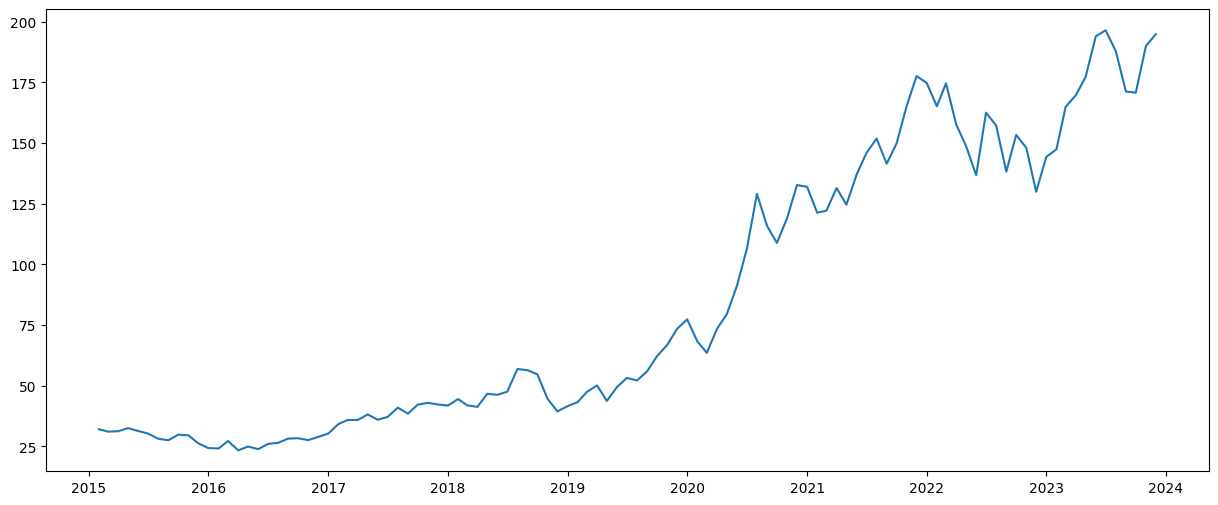

<ipython-input-151-0316dabcb8da>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close.drop("Date", axis=1, inplace=True)


In [ ]:
price["Date"] = price.index
close = price[["Date", "Close"]]
close.dropna(inplace=True)
_ = plt.figure(figsize=(15, 6))
plt.plot(close["Date"], close["Close"])
plt.show()


close.set_index(close["Date"], inplace= True)
close.asfreq("M")
close.drop("Date", axis=1, inplace=True)
close.head()
validation = close.iloc[-6:]
close = close.iloc[:-6]

# * with help

In [ ]:
import itertools

a = b = c = range(0, 5)
abc = list(itertools.product(a, b, c))

abc

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [ ]:
seasonl_abc = [(x[0], x[1], x[2], 12) for x in list(itertools.product(a, b, c))]

seasonl_abc

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 0, 3, 12),
 (0, 0, 4, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 1, 3, 12),
 (0, 1, 4, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (0, 2, 3, 12),
 (0, 2, 4, 12),
 (0, 3, 0, 12),
 (0, 3, 1, 12),
 (0, 3, 2, 12),
 (0, 3, 3, 12),
 (0, 3, 4, 12),
 (0, 4, 0, 12),
 (0, 4, 1, 12),
 (0, 4, 2, 12),
 (0, 4, 3, 12),
 (0, 4, 4, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 0, 4, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (1, 1, 4, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (1, 2, 3, 12),
 (1, 2, 4, 12),
 (1, 3, 0, 12),
 (1, 3, 1, 12),
 (1, 3, 2, 12),
 (1, 3, 3, 12),
 (1, 3, 4, 12),
 (1, 4, 0, 12),
 (1, 4, 1, 12),
 (1, 4, 2, 12),
 (1, 4, 3, 12),
 (1, 4, 4, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 0, 4, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (2, 1, 4, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 

In [ ]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(close,
                                  order=(1, 0, 1),
                                  seasonal_order=(1, 0, 1, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

results = model.fit(disp=False)

print(results.summary().tables[1])

NameError: name 'close' is not defined

In [ ]:
for param in abc:
  for param_seasonal in seasonl_abc:
    try:
      model = sm.tsa.statespace.SARIMAX(close,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
      
      results = model.fit(displ=False)
      print(f"ARIMA{param}x{param_seasonal}: AIC = {results.aic}")

    except Exception as e:
      continue

In [ ]:
predictions = results.get_prediction(start=pd.to_datetime("2015-06-01"))
prediction_interval = predictions.conf_int()

ax = validation.plot(label="Actual")
predictions.predicted_mean.plot(label="Predicted")

ax.fill_between(prediction_interval.index,
                prediction_interval.iloc[:, 0],
                prediction_interval.iloc[:, 1],
                color="blue",
                alpha=0.2)

ax.set_xlabel("Month")
ax.set_ylabel("results")
plt.legend()
plt.show()

NameError: name 'results' is not defined

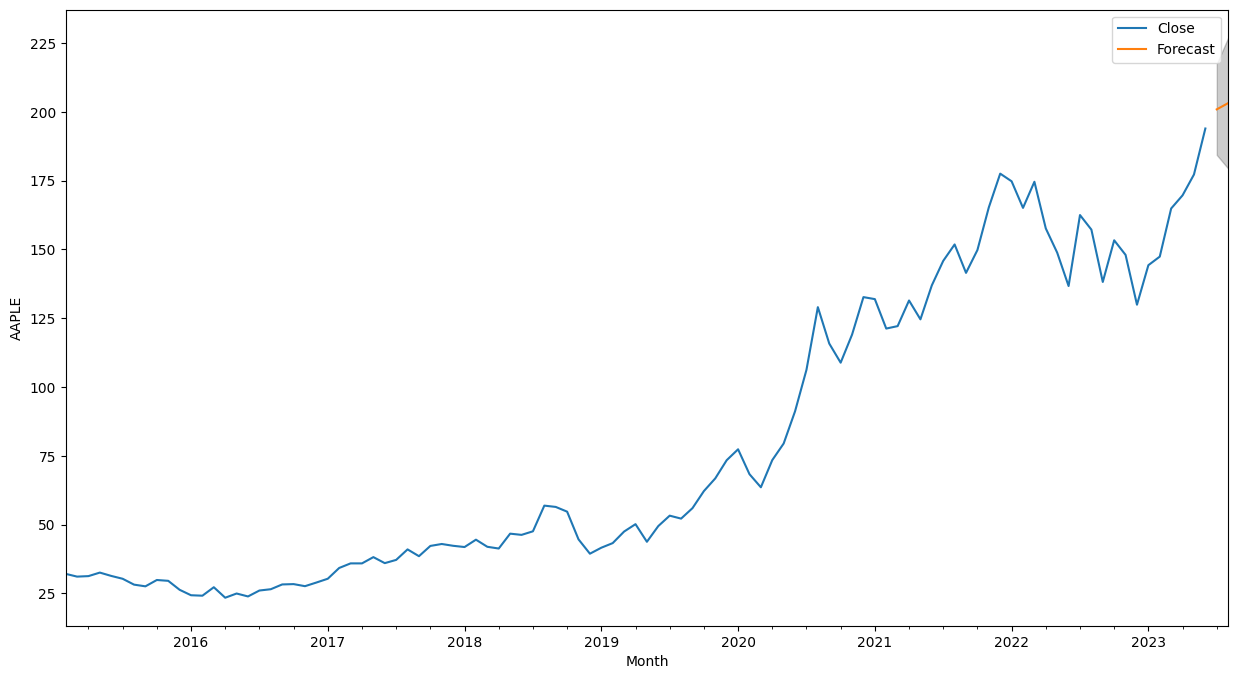

In [ ]:
# Assuming 'results' is your model results and 'close' is your close price data
forecast = results.get_forecast(steps=2)
forecast_ci = forecast.conf_int()

fig, ax = plt.subplots(figsize=(12, 6))

close.plot(label="Actual", ax=ax, color="blue")

forecast.predicted_mean.plot(label="Forecast", ax=ax, linestyle='--', color="red")

ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1],
                color="orange",  
                alpha=0.3)

ax.set_xlabel("Month")
ax.set_ylabel("Price")  
plt.title("Price Forecast")
plt.legend()
plt.grid(True)
plt.show()
